<a href="https://www.kaggle.com/code/avinashmagar05061998/student-performace-factors?scriptVersionId=221537599" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Importing Library**

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

**Dataset Importing**

In [41]:
df=pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


**Dataset First Five Data**

In [42]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


**Datasets Columns**

In [43]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

**Datasets Shape**

In [44]:
df.shape

(6607, 20)

**Datasets Size**

In [45]:
df.size

132140

**Dataset Columns Info**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

**Dataset describe**

In [47]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


**Checking Data Types Of Dataset**

In [48]:
print(df.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


**Checking Null Values Present Or Not**

In [49]:
df.isnull()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6603,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6604,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6605,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Null Values Sum**

In [50]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

**Checking Null Values Percentage**

In [51]:
df.isnull().sum()/len(df)*100

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

**Checking Null Values By Column**

In [52]:
df['Teacher_Quality'].head()

0    Medium
1    Medium
2    Medium
3    Medium
4      High
Name: Teacher_Quality, dtype: object

In [53]:
df['Teacher_Quality'].isnull().sum()

78

In [54]:
df['Parental_Education_Level'].isnull().sum()

90

In [55]:
df['Distance_from_Home'].isnull().sum()

67

**Checking Value Count Of Null Value Columns**

In [56]:
df['Teacher_Quality'].value_counts()

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

In [57]:
df['Parental_Education_Level'].value_counts()

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

In [58]:
df['Distance_from_Home'].value_counts()

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64

**Filling Null Values**

In [59]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)

In [60]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality                0
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [61]:
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0],inplace=True)

In [62]:
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0],inplace=True)

In [63]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

**Checking Outlier Of Dataset Using Boxplot**

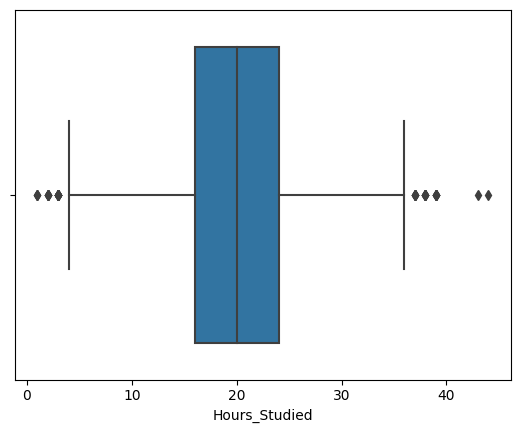

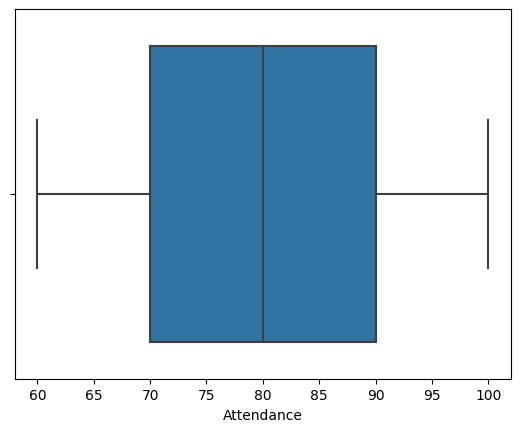

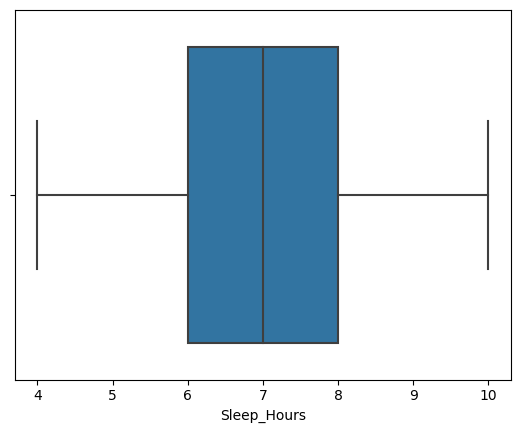

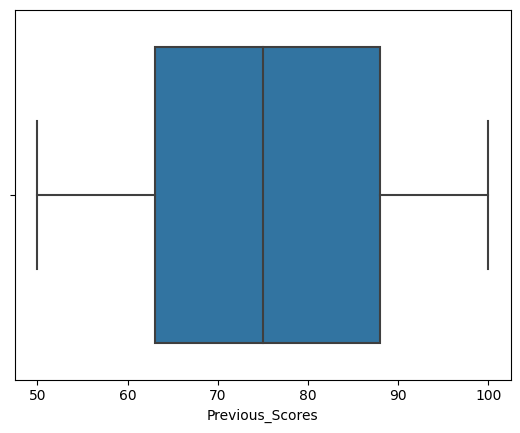

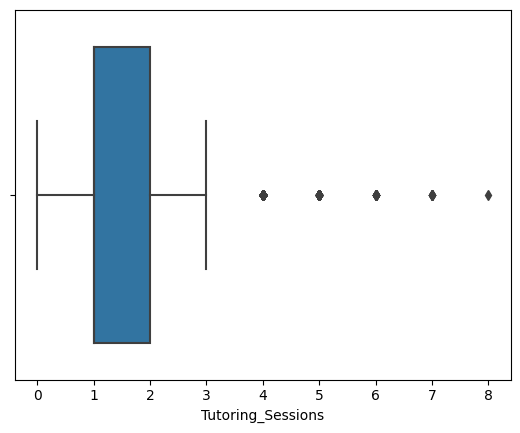

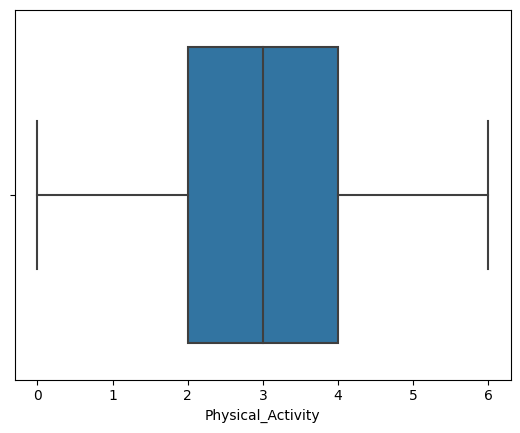

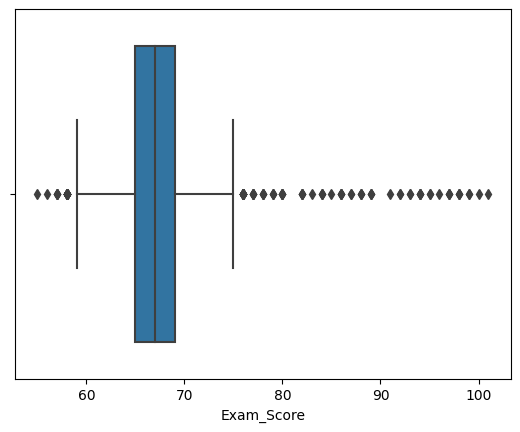

In [64]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[i])        
    plt.show()

**Treating The Outlier With Capping Method**

In [65]:
q1 = df['Exam_Score'].quantile(0.25)
q3 = df['Exam_Score'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['Exam_Score'] = df['Exam_Score'].clip(lower=ll, upper=ul)

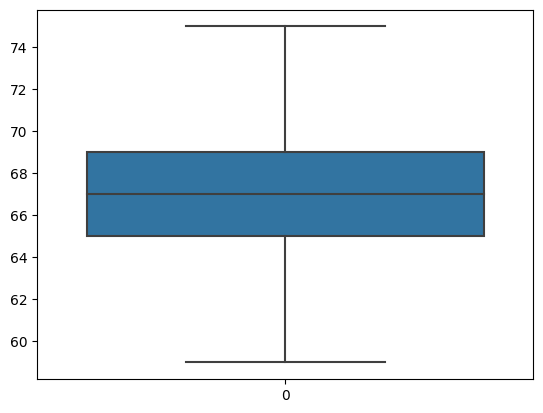

In [66]:
sns.boxplot(df['Exam_Score'])
plt.show()

In [67]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [68]:
q1 = df['Tutoring_Sessions'].quantile(0.25)
q3 = df['Tutoring_Sessions'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['Tutoring_Sessions'] = df['Tutoring_Sessions'].clip(lower=ll, upper=ul)

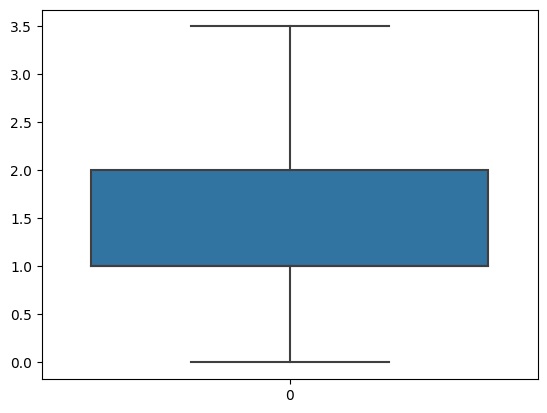

In [69]:
sns.boxplot(df['Tutoring_Sessions'])
plt.show()

In [70]:
q1 = df['Hours_Studied'].quantile(0.25)
q3 = df['Hours_Studied'].quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['Hours_Studied'] = df['Hours_Studied'].clip(lower=ll, upper=ul)

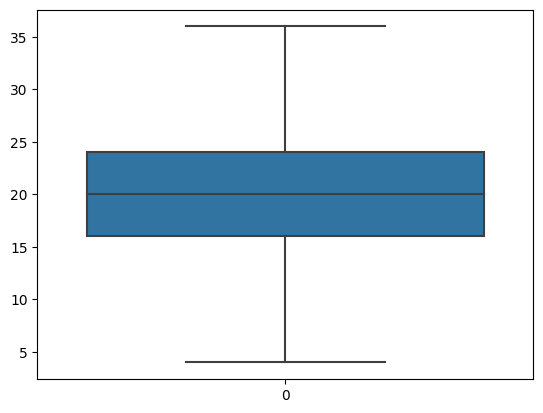

In [71]:
sns.boxplot(df['Hours_Studied'])
plt.show()

**Checking Data Is Distributed Or Not**

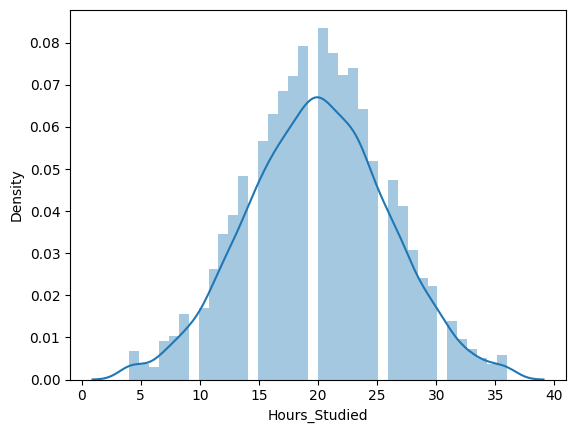

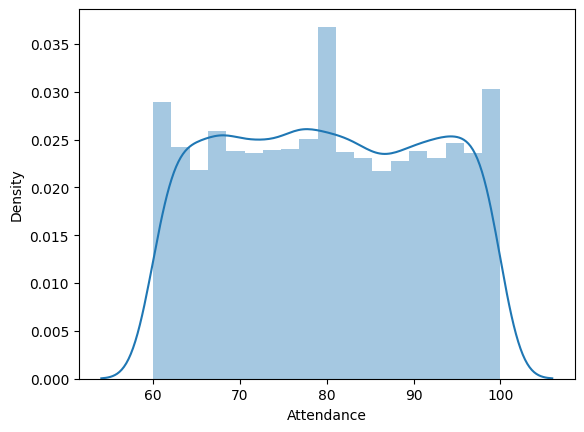

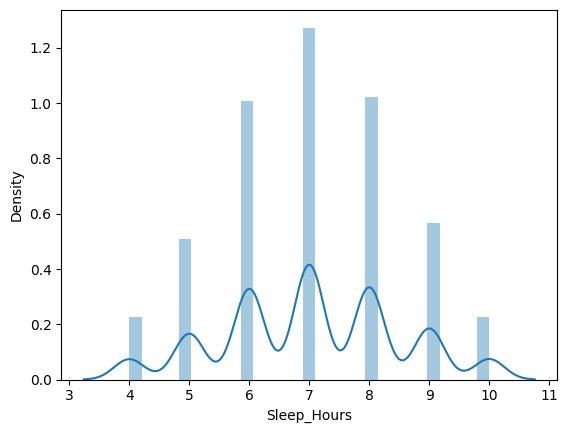

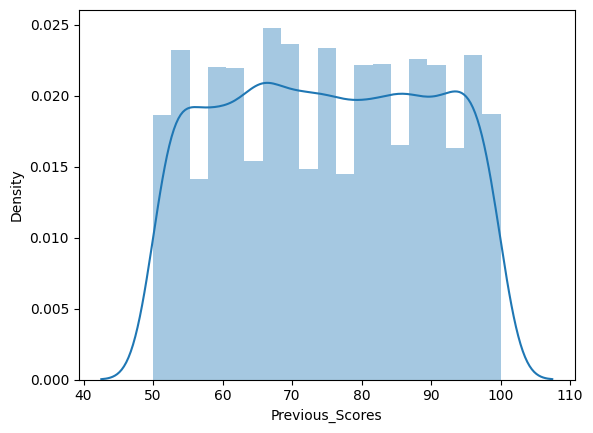

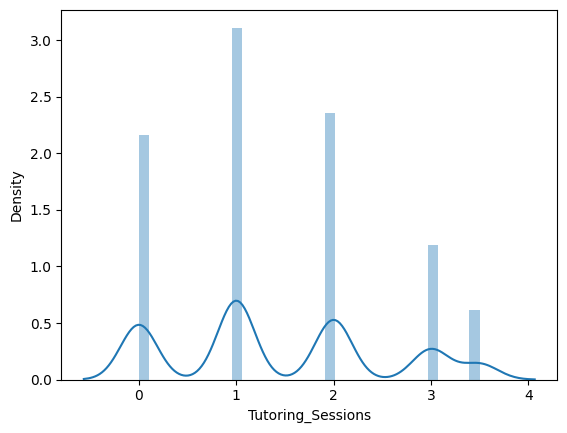

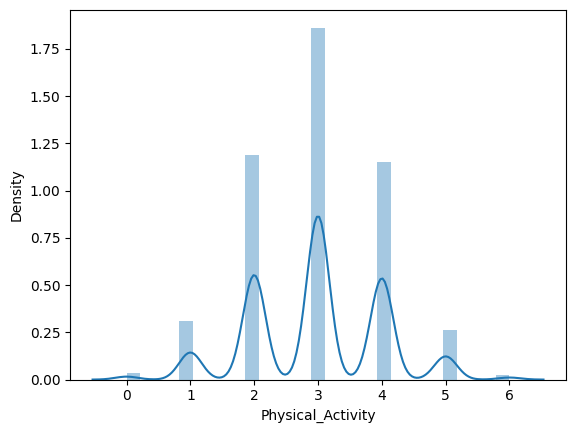

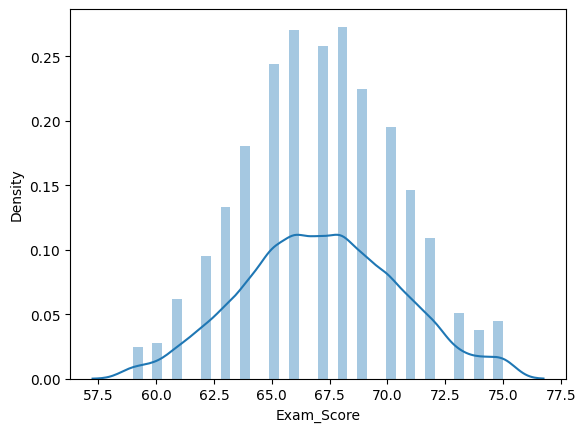

In [72]:
for i in df.select_dtypes(include=np.number).columns:
    sns.distplot(df[i])        
    plt.show()

**Checking Data Relation**

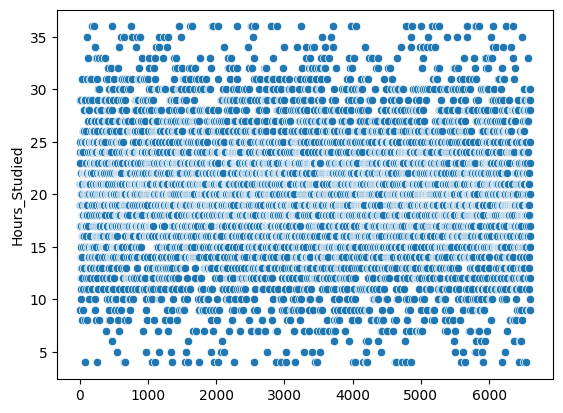

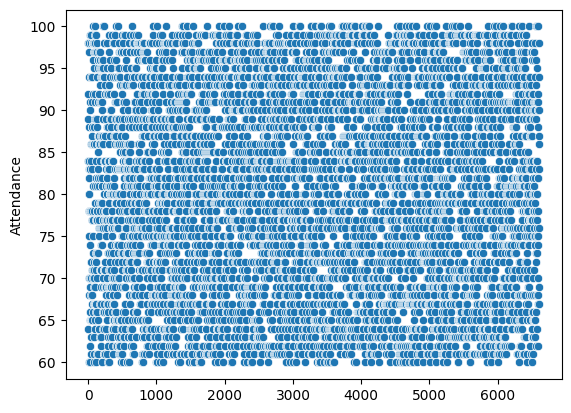

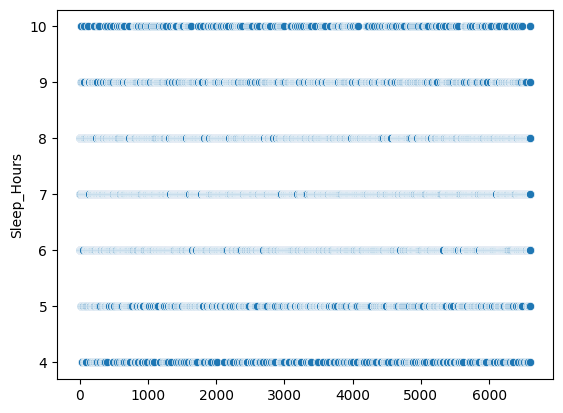

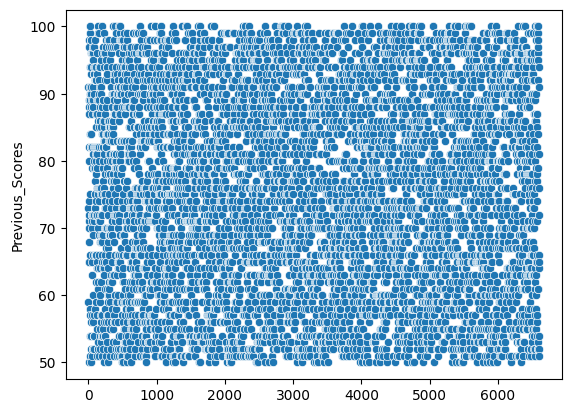

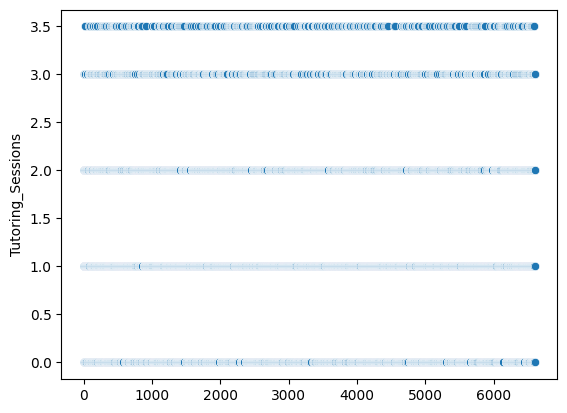

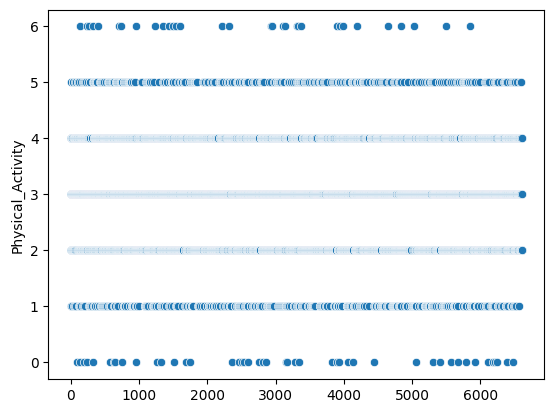

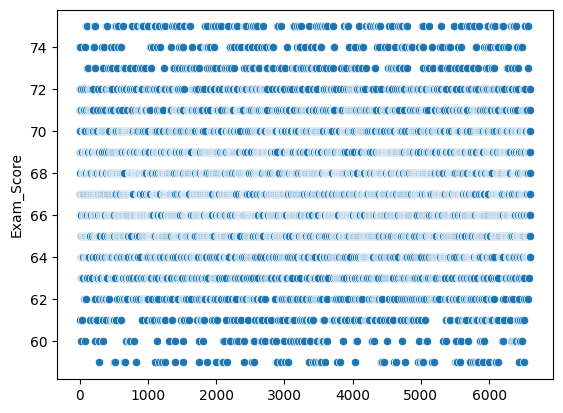

In [73]:
for i in df.select_dtypes(include=np.number).columns:
    sns.scatterplot(df[i])        
    plt.show()

**Checking Skewness of data**

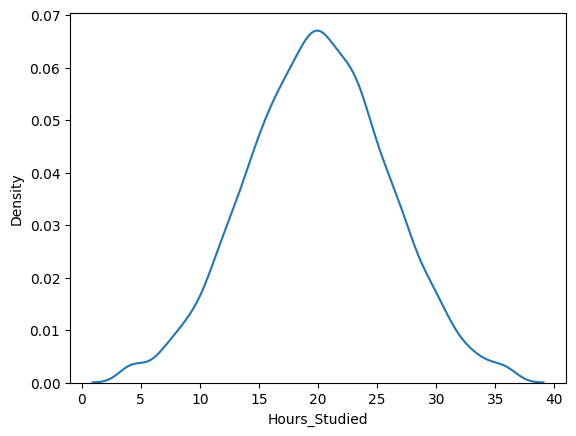

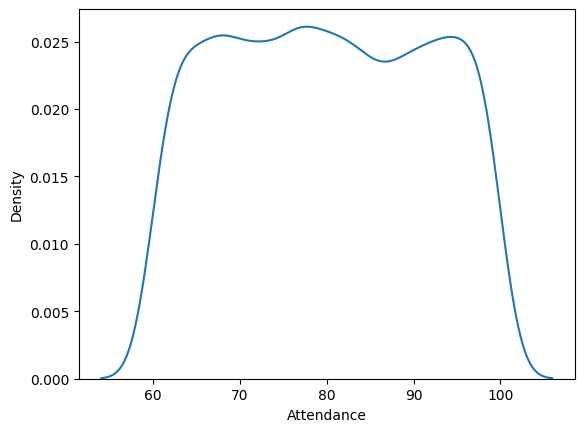

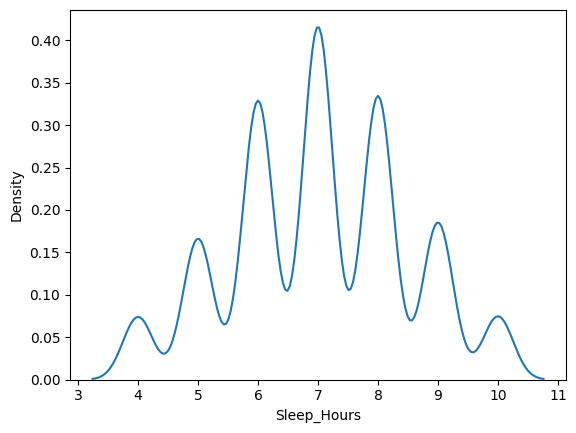

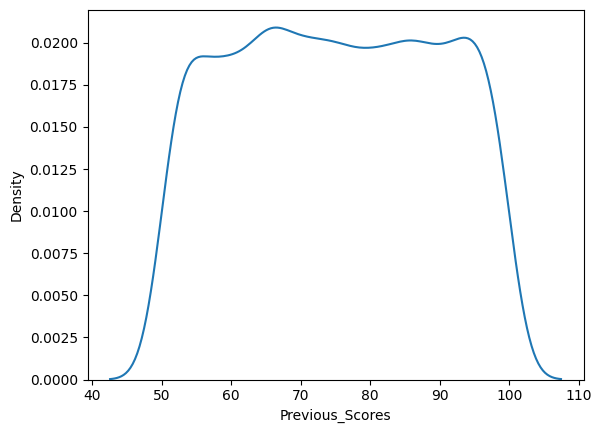

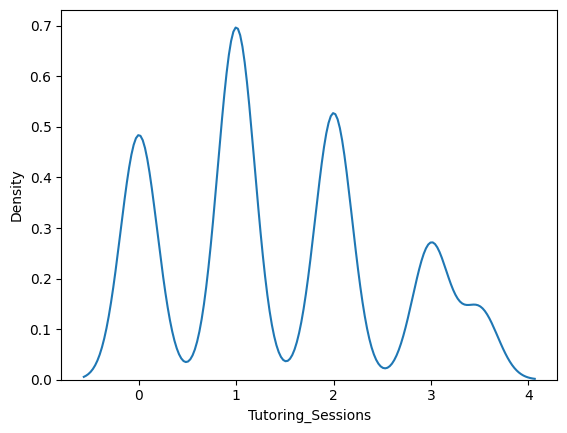

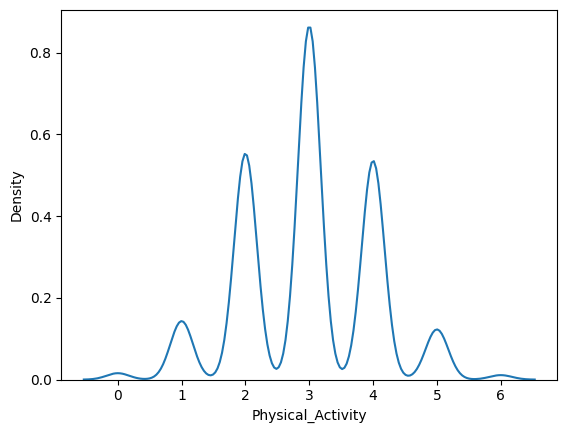

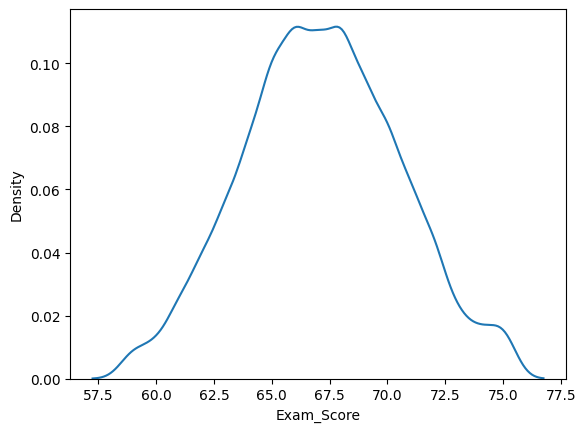

In [74]:
for i in df.select_dtypes(include=np.number).columns:
    sns.kdeplot(df[i])        
    plt.show()

**EDA**

**How does performance vary by study hours and parental Involvement?**


In [75]:
pivot_hours = df.pivot_table(values='Exam_Score', index='Hours_Studied', columns='Parental_Involvement', aggfunc='mean')
pivot_hours

Parental_Involvement,High,Low,Medium
Hours_Studied,,,
4,65.000000,61.400000,61.736842
5,62.500000,61.500000,63.461538
6,63.666667,NaN,63.454545
7,64.650000,62.666667,64.052632
8,64.592593,63.666667,63.800000
9,65.633333,62.562500,63.600000
10,65.730769,63.666667,63.880000
11,66.131579,64.037037,64.481481
12,65.796296,63.923077,64.545455


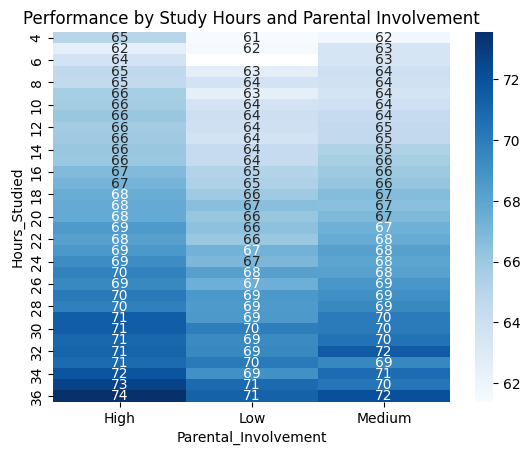

In [76]:
sns.heatmap(pivot_hours, annot=True, cmap='Blues')
plt.title('Performance by Study Hours and Parental Involvement')
plt.show()

** What is the relationship between Attendance and student performance?**

In [77]:
grouped_absence = df.groupby('Attendance')['Exam_Score'].mean()
grouped_absence

Attendance
60     62.494253
61     63.341463
62     63.710526
63     64.296774
64     63.912088
65     63.892405
66     64.489655
67     64.536842
68     65.129412
69     64.858824
70     65.236025
71     65.438272
72     65.694611
73     65.851190
74     66.109091
75     66.208054
76     66.697297
77     66.472826
78     66.890909
79     66.834286
80     67.088757
81     67.232143
82     67.317919
83     67.528662
84     67.742857
85     67.883562
86     68.549669
87     68.695364
88     68.800000
89     68.950617
90     69.371795
91     69.417143
92     69.616883
93     69.670659
94     69.577778
95     70.049080
96     70.309524
97     70.335404
98     70.352941
99     70.701299
100    70.728395
Name: Exam_Score, dtype: float64

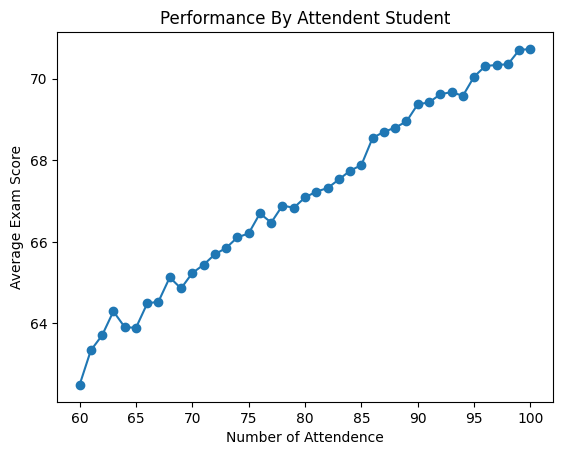

In [78]:
# Line Plot
grouped_absence.plot(kind='line', marker='o', title='Performance By Attendent Student')
plt.xlabel('Number of Attendence')
plt.ylabel('Average Exam Score')
plt.show()